In [225]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import random

In [129]:
import torch
from torch import nn

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

%matplotlib inline
import matplotlib.pyplot as plt

import torchsde

def plot(ts, samples, xlabel, ylabel, title=''):
    ts = ts.cpu()
    samples = samples.squeeze().t().cpu()
    plt.figure()
    for i, sample in enumerate(samples):
        plt.plot(ts, sample, marker='x', label=f'sample {i}')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

In [468]:
class SDE(nn.Module):

    def __init__(self):
        super().__init__()
        self.theta = nn.Parameter(torch.eye(2), requires_grad=True)  # Scalar parameter.
        self.noise_type = "diagonal"
        self.sde_type = "ito"
    
    def f(self, t, y):
        y_ = y.clone().detach().requires_grad_(True) 
        # y_.retain_grad()
        loss = torch.sum(torch.square(y_[0]-1))
        loss.backward()
        delta = y_.grad
        return torch.sin(t)  - 0*delta
    
    def g(self, t, y):
        return 0.2 * torch.sigmoid(torch.cos(t) * torch.exp(-y))

In [469]:
batch_size, state_size, t_size = 100, 2, 200
sde = SDE()
ts = torch.linspace(0, 10, t_size)
y0 = torch.full(size=(batch_size, state_size), fill_value=0.1)

y0.shape

torch.Size([100, 2])

In [470]:
ys = torchsde.sdeint(sde, y0, ts, method='euler')  # (t_size, batch_size, state_size) = (100, 3, 1).

In [471]:
ys = ys.detach().numpy()

In [472]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML


In [473]:
cmap = plt.cm.jet  # define the colormap
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]

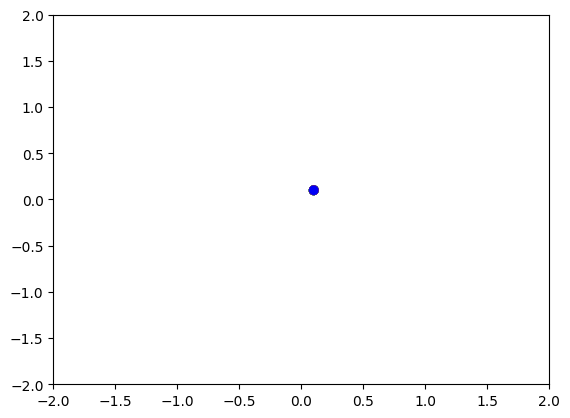

In [474]:
fig, ax = plt.subplots()
x, y = ys[0,:,0],ys[i,:,0]
sc = ax.scatter(x,y, c = random.choices(cmaplist, k=y.shape[0]))
plt.xlim(-2,2)
plt.ylim(-2,2)

def animate(i):
    data = np.stack([ys[i,:,0], ys[i,:,1]]).T 
    sc.set_offsets(data)

ani = animation.FuncAnimation(fig, animate, 
                frames=range(ys.shape[0]), interval=20, repeat=True) 
HTML(ani.to_jshtml())
# plt.show()